# Linear regression with one variable

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [173]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [174]:
data.insert(0, 'Ones', 1)

In [175]:
def compute_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [180]:
def get_x_y_matrices_from_data(data):
    cols = data.shape[1]
    
    X = data.iloc[:,0:cols-1]
    y = data.iloc[:,cols-1:cols]

    X = np.matrix(X.values)
    y = np.matrix(y.values)
    
    theta = np.matrix(np.zeros((1, cols-1)))
    
    return X, y, theta

In [181]:
X, y, theta = get_x_y_matrices_from_data(data)
# theta = np.matrix(np.array([0,0]))

In [182]:
compute_cost(X, y, theta)

32.072733877455676

In [183]:
def gradient_decent(X, y, theta, alpha, iterations):
    # Create a vector - temp and theta the size of #columns of X. Initalize temp to 0s
    # Run #iterations->i and in each iteration:
    # 1. Compute the inner cost derivative term -> (X*Theta.T) - y (https://www.coursera.org/learn/machine-learning/supplement/U90DX/gradient-descent-for-linear-regression)
    # 2.1 Iterate #len(theta)->j iterations (according to the number of params)
    # 2.1.1 Update temp[j] to: theta[j] - , (alpha * sum(1 to m, inner term) / m)
    # 2.2 Update theta = temp
    # 3. Return theta
    
    temp = np.matrix(np.zeros(theta.shape))
    num_params = int(theta.ravel().shape[1])
    cost = np.zeros(iterations) # Taken from following link for debugging the descent over iterations: http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb
    
    for i in range(0, iterations):
        inner_error = (X * theta.T) - y
        
        for j in range(0, num_params):
            inner = inner_error.T * X[:,j]
            temp[0, j] = theta[0, j] - ((alpha * (np.sum(inner))) / len(X))
        
        theta = temp
        cost[i] = compute_cost(X, y, theta)
        
    return theta, cost


In [184]:
iterations = 1500
alpha = 0.01

In [185]:
g, cost = gradient_decent(X, y, theta, alpha, iterations)
g


matrix([[-3.63029144,  1.16636235]])

Text(0.5,1,'Predicted Profit vs. Population Size')

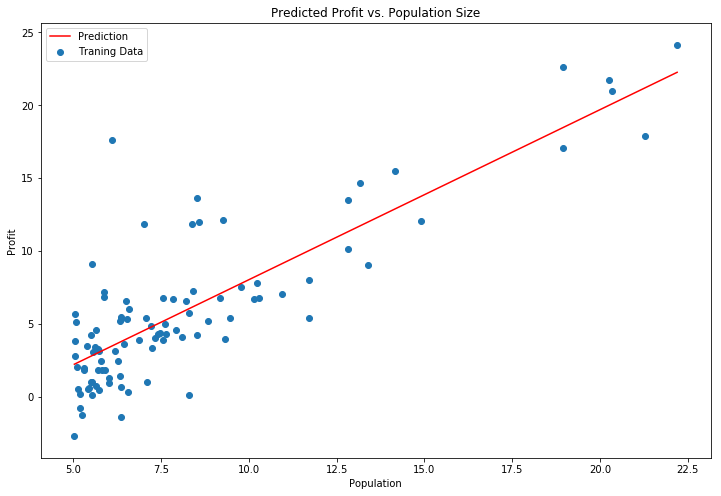

In [186]:
# Copied from http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# Part 2 - Linear Regression with Multiple variables

In [151]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size (sqft)', 'Num. Bedrooms', 'Price'])
data2.head()

,Size (sqft),Num. Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [152]:
data2.describe()

,Size (sqft),Num. Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [153]:
def normalize_features(data):
    return (data - data.mean()) / data.std()

norm_data = normalize_features(data2)

In [ ]:
data2.insert(0, 'Ones', 1)

In [203]:
X2, y2, theta2 = get_x_y_matrices_from_data(norm_data)
alpha = 0.01
iterations = 1500

In [204]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iterations)

In [205]:
compute_cost(X2, y2, g2)

0.13068670606095903

Text(0.5,1,'Error vs. Training Epoch')

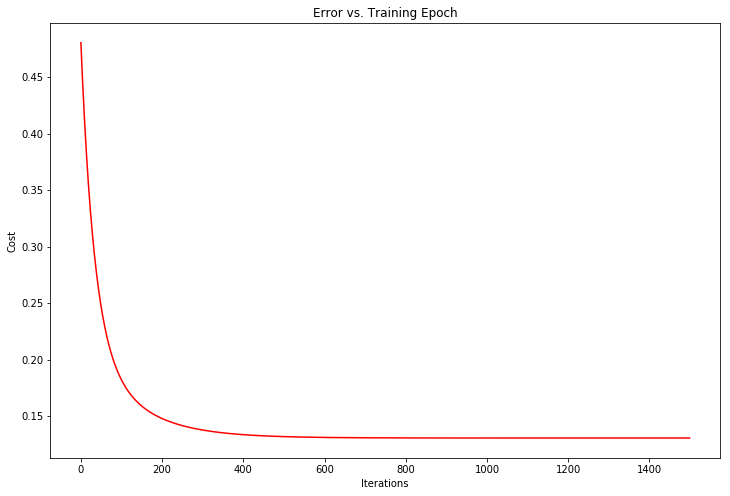

In [206]:
# Taken from: http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')